In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import os
import torch

In [ ]:
# def csv_to_coco(csv_path, meta_csv, output_json):
#     df = pd.read_csv(csv_path)
#     meta_df = pd.read_csv(meta_csv)
#     filtered_df = df[df["image_id"].isin(meta_df["image_id"])]

#     class_map = {"ulcer": 0, "polyp": 1, "cancer": 2}
#     coco_json = {"images": [], "annotations": [], "categories": []}

#     for class_name, class_id in class_map.items():
#         coco_json["categories"].append({"id": class_id, "name": class_name})

#     image_id_map = {}
#     annotation_id = 1

#     for _, row in filtered_df.iterrows():
#         image_id = row["image_id"]
#         image_name = row["image_id"]

#         if image_id not in image_id_map:
#             image_id_map[image_id] = image_name
#             coco_json["images"].append({
#                 "id": image_id,
#                 "width": row["width"],
#                 "height": row["height"],
#                 "file_name": image_name
#             })

#         x_min, y_min, x_max, y_max = row["x_min"], row["y_min"], row["x_max"], row["y_max"]
#         bbox = [x_min, y_min, x_max - x_min, y_max - y_min]

#         coco_json["annotations"].append({
#             "id": annotation_id,
#             "image_id": image_id,
#             "category_id": class_map[row["lesion"]],
#             "bbox": bbox,
#             "area": bbox[2] * bbox[3],
#             "iscrowd": 0
#         })
#         annotation_id += 1

#     with open(output_json, "w") as f:
#         json.dump(coco_json, f, indent=4)

#     print(f"COCO JSON saved: {output_json}")

# base_path = r"/content/drive/MyDrive/Endoscope Detection/colonoscopy"
# csv_path = r"/content/drive/MyDrive/Endoscope Detection/colonoscopy/resize_colonoscopy.csv"

# meta_paths = {
#     "train": "/content/drive/MyDrive/Endoscope Detection/colonoscopy/train_meta.csv",
#     "val": "/content/drive/MyDrive/Endoscope Detection/colonoscopy/val_meta.csv",
#     "test": "/content/drive/MyDrive/Endoscope Detection/colonoscopy/test_meta.csv",
# }

# json_paths = {
#     "train": os.path.join(base_path, "Dataset", "train_coco.json"),
#     "val": os.path.join(base_path, "Dataset", "val_coco.json"),
#     "test": os.path.join(base_path, "Dataset", "test_coco.json"),
# }

# for split in ["train", "val", "test"]:
#     csv_to_coco(csv_path, meta_paths[split], json_paths[split])


In [ ]:
!python -m pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.2 MB/s eta 0:00:00


In [ ]:
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
import json

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
import json

def register_coco_dataset(name, json_file, image_root):
    DatasetCatalog.register(
        name,
        lambda: load_coco_json(json_file, image_root)
    )
    MetadataCatalog.get(name).set(thing_classes=["ulcer", "polyp","cancer"])

def load_coco_json(json_file, image_root):
    with open(json_file, "r") as f:
        coco_data = json.load(f)

    dataset_dicts = []
    for image_info in coco_data['images']:
        record = {}
        record['file_name'] = os.path.join(image_root, image_info['file_name'])
        record['image_id'] = image_info['id']
        record['height'] = image_info['height']
        record['width'] = image_info['width']

        annotations = []
        for ann in coco_data['annotations']:
            if ann['image_id'] == image_info['id']:
                annotations.append({
                    "bbox": ann['bbox'],
                    "bbox_mode": BoxMode.XYWH_ABS,
                    "category_id": ann['category_id']
                })

        record['annotations'] = annotations
        dataset_dicts.append(record)
    return dataset_dicts


image_folders = {
    "train": r"/content/drive/MyDrive/Endoscope Detection/colonoscopy/Dataset/images/train",
    "val": r"/content/drive/MyDrive/Endoscope Detection/colonoscopy/Dataset/images/val",
    "test": r"/content/drive/MyDrive/Endoscope Detection/colonoscopy/Dataset/images/test"
}

base_path = r"/content/drive/MyDrive/Endoscope Detection/colonoscopy"
json_paths = {
    "train": os.path.join(base_path, "Dataset", "train_coco.json"),
    "val": os.path.join(base_path, "Dataset", "val_coco.json"),
    "test": os.path.join(base_path, "Dataset", "test_coco.json"),
}

for split in ["train", "val", "test"]:
    register_coco_dataset(f"colonoscopy_{split}", json_paths[split], image_folders[split])


In [ ]:
!pip install albumentations

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.solver import build_lr_scheduler, build_optimizer
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_train_loader, build_detection_test_loader

In [ ]:
!wget -O /content/drive/MyDrive/Endoscope/Detection/colonoscopy/Base-RCNN-FPN.yaml https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml


--2025-02-24 15:49:16--  https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318 (1.3K) [text/plain]
Saving to: ‘/content/drive/MyDrive/Endoscope/Detection/colonoscopy/Base-RCNN-FPN.yaml’

/content/drive/MyDr 100%[===================>]   1.29K  --.-KB/s    in 0s      

2025-02-24 15:49:16 (68.4 MB/s) - ‘/content/drive/MyDrive/Endoscope/Detection/colonoscopy/Base-RCNN-FPN.yaml’ saved [1318/1318]



In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, DatasetMapper
from detectron2.data.transforms import (RandomFlip, RandomRotation, RandomContrast, RandomBrightness, RandomLighting)
from detectron2.engine import DefaultTrainer
from detectron2.data import build_detection_train_loader, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator
from detectron2.config import get_cfg
import os
import cv2
import random
import numpy as np
from detectron2.data.transforms import Augmentation, Transform
from detectron2.data import detection_utils as utils
from detectron2.structures import BoxMode


In [ ]:
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    return image

class Mosaic:
    def __init__(self, prob=0.5, image_size=(128, 128)):
        self.prob = prob
        self.image_size = image_size

    def __call__(self, dataset_dicts):
        if random.random() >= self.prob:
            return dataset_dicts[0]

        h, w = self.image_size
        mosaic_image = np.zeros((h, w, 3), dtype=np.uint8)
        mosaic_boxes = []
        mosaic_classes = []

        selected_samples = random.sample(dataset_dicts, 4)
        positions = [
            (0, 0), (w // 2, 0),
            (0, h // 2), (w // 2, h // 2)
        ]

        for i, sample in enumerate(selected_samples):
            image_path = sample["file_name"]
            image = load_image(image_path)
            orig_h, orig_w = image.shape[:2]


            x1 = random.randint(0, orig_w // 2)
            y1 = random.randint(0, orig_h // 2)
            x2 = random.randint(orig_w // 2, orig_w)
            y2 = random.randint(orig_h // 2, orig_h)
            cropped_image = image[y1:y2, x1:x2]

            pos_x, pos_y = positions[i]

            resized_crop = cv2.resize(cropped_image, (w // 2, h // 2))
            mosaic_image[pos_y:pos_y + h // 2, pos_x:pos_x + w // 2] = resized_crop

            for ann in sample["annotations"]:
                bbox = ann["bbox"]
                bbox_mode = ann["bbox_mode"]

                if bbox_mode != BoxMode.XYXY_ABS:
                    bbox = BoxMode.convert(bbox, bbox_mode, BoxMode.XYXY_ABS)

                x_min, y_min, x_max, y_max = bbox


                if x_min < x2 and x_max > x1 and y_min < y2 and y_max > y1:
                    clipped_bbox = [
                        max(x_min, x1) - x1,  # X_min 상대 좌표
                        max(y_min, y1) - y1,  # Y_min 상대 좌표
                        min(x_max, x2) - x1,  # X_max 상대 좌표
                        min(y_max, y2) - y1   # Y_max 상대 좌표
                    ]

                    scale_x = (w // 2) / (x2 - x1)
                    scale_y = (h // 2) / (y2 - y1)
                    scaled_bbox = [
                        clipped_bbox[0] * scale_x + pos_x,
                        clipped_bbox[1] * scale_y + pos_y,
                        clipped_bbox[2] * scale_x + pos_x,
                        clipped_bbox[3] * scale_y + pos_y
                    ]

                    mosaic_boxes.append(scaled_bbox)
                    mosaic_classes.append(ann["category_id"])

        dataset_dicts[0]["image"] = mosaic_image
        dataset_dicts[0]["annotations"] = [
            {"bbox": bbox, "bbox_mode": BoxMode.XYXY_ABS, "category_id": cls}
            for bbox, cls in zip(mosaic_boxes, mosaic_classes)
        ]

        return dataset_dicts[0]

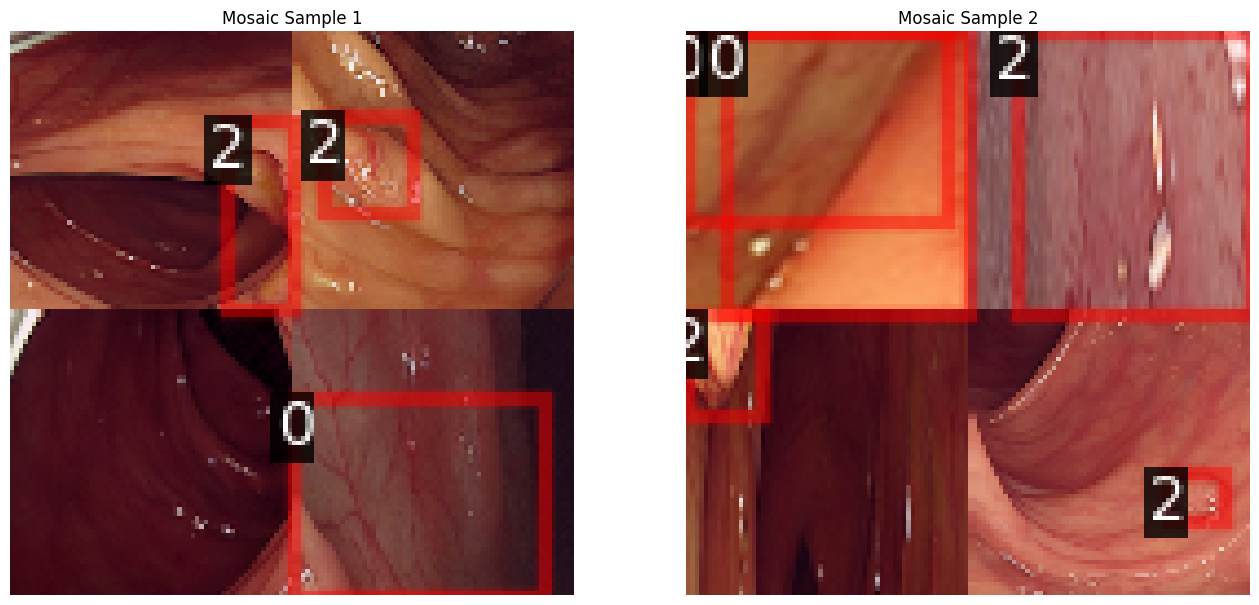

In [ ]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

def visualize_mosaic(dataset_name, num_samples=2):
    dataset_dicts = DatasetCatalog.get(dataset_name)
    metadata = MetadataCatalog.get(dataset_name)

    mosaic_images = []

    for _ in range(num_samples):
        mosaic_transform = Mosaic(prob=1.0)
        mosaic_sample = mosaic_transform(random.sample(dataset_dicts, 4))

        image = mosaic_sample["image"]
        annotations = mosaic_sample["annotations"]

        visualizer = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.0)
        for ann in annotations:
            bbox = ann["bbox"]
            category_id = ann["category_id"]
            visualizer.draw_box(bbox, edge_color="red", line_style="-")
            visualizer.draw_text(str(category_id), (bbox[0], bbox[1]), color="white")

        output = visualizer.get_output()
        mosaic_images.append(output.get_image())

    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 8, 8))

    for i in range(num_samples):
        axes[i].imshow(mosaic_images[i])
        axes[i].axis("off")
        axes[i].set_title(f"Mosaic Sample {i+1}")

    plt.show()

visualize_mosaic("colonoscopy_train", num_samples=2)

In [ ]:
def adjust_augmentation(cfg):
    augmentations = [
        RandomFlip(prob=0.4, horizontal=True, vertical=False),
        RandomContrast(intensity_min=0.5, intensity_max=1.5),
        RandomBrightness(intensity_min=0.5, intensity_max=1.5),
        RandomLighting(scale=0.1),
        RandomRotation(angle=[-10, 10], expand=True),
        Mosaic(prob=0.2)
    ]
    mapper = DatasetMapper(cfg, is_train=True, augmentations=augmentations)
    return build_detection_train_loader(cfg, mapper=mapper)

In [ ]:
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return adjust_augmentation(cfg)

    @classmethod
    def build_test_loader(cls, cfg, dataset_name):
        return build_detection_test_loader(cfg, dataset_name)

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = cfg.OUTPUT_DIR
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

In [ ]:
"""
_BASE_: "/content/drive/MyDrive/Endoscope Detection/colonoscopy/faster_rcnn_R_50_FPN_3x.yaml"

MODEL:
  META_ARCHITECTURE: "GeneralizedRCNN"
  WEIGHTS: "detectron2://ImageNetPretrained/MSRA/R-50.pkl"
  MASK_ON: False
  RESNETS:
    DEPTH: 50

DATASETS:
  TRAIN: ("colonoscopy_train",)
  TEST: ("colonoscopy_val",)

DATALOADER:
  NUM_WORKERS: 2

SOLVER:
  IMS_PER_BATCH: 8
  BASE_LR: 0.0025
  MAX_ITER: 10000
  LR_SCHEDULER_NAME: "WarmupMultiStepLR"
  WARMUP_FACTOR: 5e-4
  WARMUP_ITERS: 1000
  WEIGHT_DECAY: 1e-4

INPUT:
  MIN_SIZE_TRAIN: (256, 512, 1024)
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 256
  MAX_SIZE_TEST: 1333

TEST:
  EVAL_PERIOD: 5000

OUTPUT_DIR: "/content/drive/MyDrive/Endoscope Detection/colonoscopy/Detectron2/experiment"

"""

'\n_BASE_: "/content/drive/MyDrive/Endoscope Detection/colonoscopy/faster_rcnn_R_50_FPN_3x.yaml"\n\nMODEL:\n  META_ARCHITECTURE: "GeneralizedRCNN"\n  WEIGHTS: "detectron2://ImageNetPretrained/MSRA/R-50.pkl"\n  MASK_ON: False\n  RESNETS:\n    DEPTH: 50\n\nDATASETS:\n  TRAIN: ("colonoscopy_train",)\n  TEST: ("colonoscopy_val",)\n\nDATALOADER:\n  NUM_WORKERS: 2\n  TOTAL_BATCH_SIZE: 8\n\nSOLVER:\n  IMS_PER_BATCH: 8 \n  BASE_LR: 0.0025\n  MAX_ITER: 10000\n  LR_SCHEDULER_NAME: "WarmupMultiStepLR"\n  WARMUP_FACTOR: 5e-4\n  WARMUP_ITERS: 1000\n  WEIGHT_DECAY: 1e-4\n\nINPUT:\n  MIN_SIZE_TRAIN: (256, 512, 1024)\n  MAX_SIZE_TRAIN: 1333\n  MIN_SIZE_TEST: 256\n  MAX_SIZE_TEST: 1333\n\nTEST:\n  EVAL_PERIOD: 5000\n\nOUTPUT_DIR: "/content/drive/MyDrive/Endoscope Detection/colonoscopy/Detectron2/experiment"\n\n'

In [ ]:
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/Endoscope Detection/colonoscopy/config.yaml")

cfg.OUTPUT_DIR = "/content/drive/MyDrive/Endoscope Detection/colonoscopy/Detectron2/experiment/v5"
cfg.DATASETS.TRAIN = ("colonoscopy_train",)
cfg.DATASETS.TEST = ("colonoscopy_val",)

trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/24 15:51:23 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

R-50.pkl: 102MB [00:01, 54.5MB/s]                           


[02/24 15:51:25 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[02/24 15:51:25 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[02/24 15:51:25 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/24 15:52:11 d2.utils.events]:  eta: 5:02:41  iter: 19  total_loss: 3.822  loss_cls: 3.098  loss_box_reg: 0.008083  loss_rpn_cls: 0.6958  loss_rpn_loc: 0.01489    time: 2.1607  last_time: 8.0285  data_time: 1.7947  last_data_time: 7.5918   lr: 4.8726e-05  max_mem: 1548M
[02/24 15:52:50 d2.utils.events]:  eta: 4:56:11  iter: 39  total_loss: 0.7136  loss_cls: 0.08998  loss_box_reg: 0.01594  loss_rpn_cls: 0.5842  loss_rpn_loc: 0.01284    time: 1.9434  last_time: 1.6520  data_time: 1.3763  last_data_time: 1.2622   lr: 9.8701e-05  max_mem: 1552M
[02/24 15:53:24 d2.utils.events]:  eta: 4:49:41  iter: 59  total_loss: 0.5839  loss_cls: 0.1531  loss_box_reg: 0.04398  loss_rpn_cls: 0.3578  loss_rpn_loc: 0.0159    time: 1.8526  last_time: 1.8429  data_time: 1.2828  last_data_time: 1.4038   lr: 0.00014868  max_mem: 1552M
[02/24 15:53:59 d2.utils.events]:  eta: 4:44:52  iter: 79  total_loss: 0.4248  loss_cls: 0.1712  loss_box_reg: 0.04057  loss_rpn_cls: 0.1946  loss_rpn_loc: 0.01439    time: 1.8